Initial Data Preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               1000

C:\Users\11817\AppData\Local\Temp\ipykernel_52316\3720771772.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hypertension', palette='viridis')


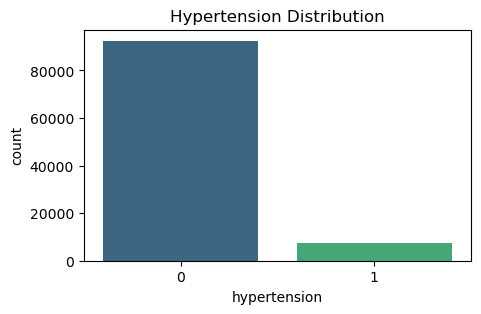

C:\Users\11817\AppData\Local\Temp\ipykernel_52316\3720771772.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='heart_disease', palette='plasma')


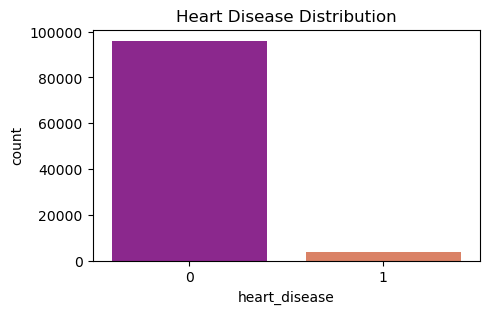

C:\Users\11817\AppData\Local\Temp\ipykernel_52316\3720771772.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='cool')


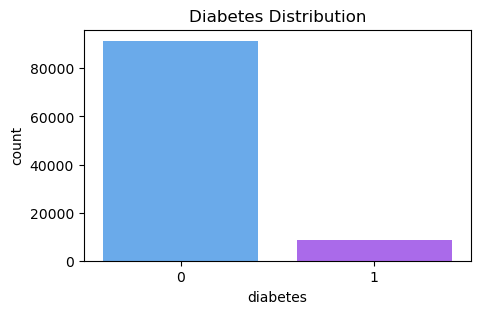


Transformed `smoking_history` Column:
smoking_history
never      54632
former     30943
current    14407
Name: count, dtype: int64


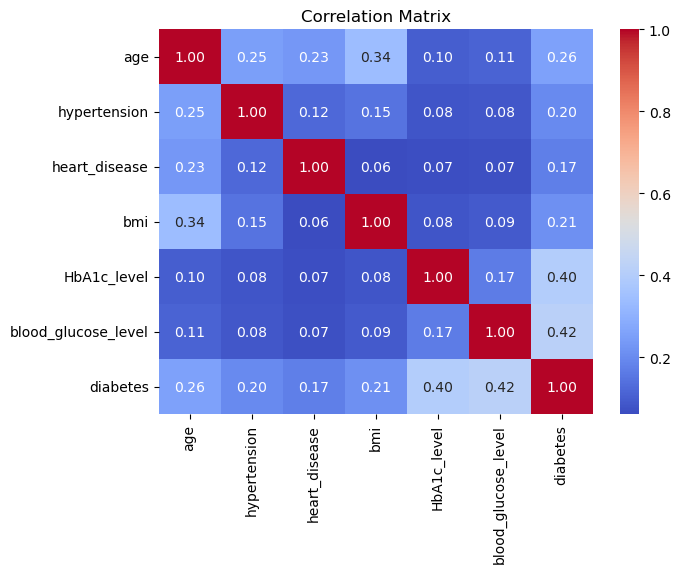


Training models for Hypertension...

Logistic Regression for Hypertension:
Accuracy: 0.92
AUC: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18527
           1       0.21      0.02      0.03      1470

    accuracy                           0.92     19997
   macro avg       0.57      0.51      0.50     19997
weighted avg       0.87      0.92      0.89     19997



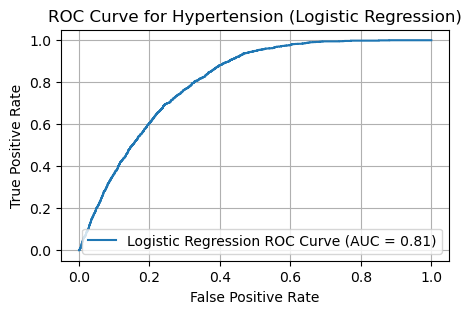


XGBoost for Hypertension:
Accuracy: 0.92
AUC: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18527
           1       0.23      0.01      0.02      1470

    accuracy                           0.92     19997
   macro avg       0.58      0.50      0.49     19997
weighted avg       0.88      0.92      0.89     19997



c:\Users\11817\.conda\envs\cs326\lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:30] WARNING: D:\bld\xgboost-split_1732150487547\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


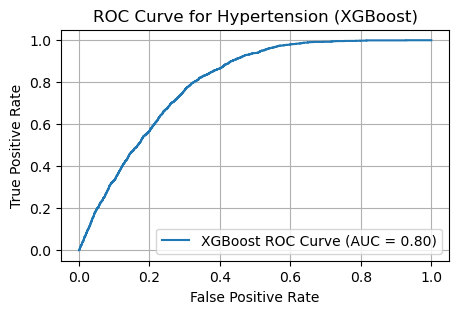


Training models for Heart Disease...

Logistic Regression for Heart Disease:
Accuracy: 0.96
AUC: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19166
           1       0.10      0.00      0.00       831

    accuracy                           0.96     19997
   macro avg       0.53      0.50      0.49     19997
weighted avg       0.92      0.96      0.94     19997



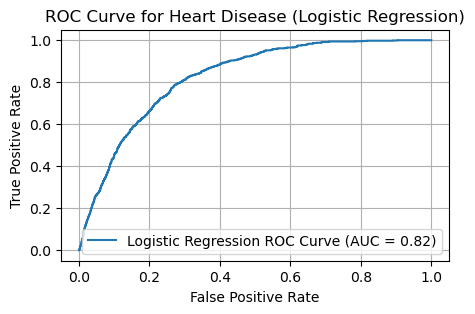


XGBoost for Heart Disease:
Accuracy: 0.96


c:\Users\11817\.conda\envs\cs326\lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:31] WARNING: D:\bld\xgboost-split_1732150487547\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19166
           1       0.26      0.01      0.02       831

    accuracy                           0.96     19997
   macro avg       0.61      0.51      0.50     19997
weighted avg       0.93      0.96      0.94     19997



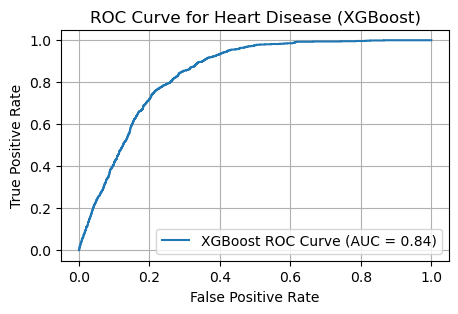


Training models for Diabetes...

Logistic Regression for Diabetes:
Accuracy: 0.96
AUC: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.86      0.60      0.71      1775

    accuracy                           0.96     19997
   macro avg       0.91      0.80      0.84     19997
weighted avg       0.95      0.96      0.95     19997



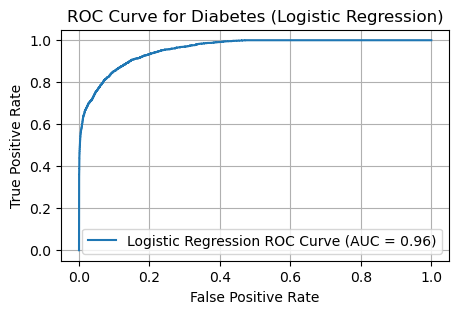


XGBoost for Diabetes:
Accuracy: 0.96
AUC: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.89      0.59      0.71      1775

    accuracy                           0.96     19997
   macro avg       0.92      0.79      0.84     19997
weighted avg       0.95      0.96      0.95     19997



c:\Users\11817\.conda\envs\cs326\lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:31] WARNING: D:\bld\xgboost-split_1732150487547\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


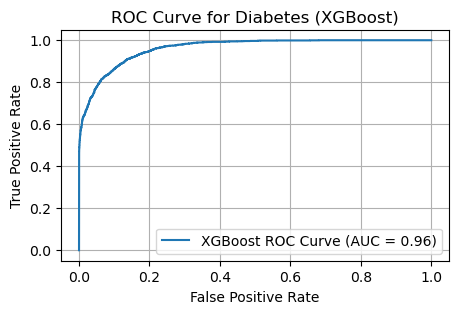

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

file_path = r"C:\Users\11817\Desktop\diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

print("Initial Data Preview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values Before Handling:")
print(df.isnull().sum())

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='hypertension', palette='viridis')
plt.title("Hypertension Distribution")
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='heart_disease', palette='plasma')
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='diabetes', palette='cool')
plt.title("Diabetes Distribution")
plt.show()

df = df[df['gender'] != 'Other']

smoking_mapping = {
    'never': 0,          
    'No Info': np.nan,   
    'current': 2,        
    'former': 1,      
    'ever': 1,           
    'not current': 1    
}
df['smoking_history_numeric'] = df['smoking_history'].map(smoking_mapping)

non_nan_values = df['smoking_history_numeric'].dropna()
df['smoking_history_numeric'] = df['smoking_history_numeric'].apply(
    lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x
)

reverse_smoking_mapping = {
    0: 'never',
    1: 'former',
    2: 'current'
}
df['smoking_history'] = df['smoking_history_numeric'].round().map(reverse_smoking_mapping)

df.drop(columns=['smoking_history_numeric'], inplace=True)

print("\nTransformed `smoking_history` Column:")
print(df['smoking_history'].value_counts())

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

plt.figure(figsize=(7, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

target_hypertension = df['hypertension']
target_heart_disease = df['heart_disease']
target_diabetes = df['diabetes']

features_hyp = df.drop(['hypertension'], axis=1)
features_hd = df.drop(['heart_disease'], axis=1)
features_dia = df.drop(['diabetes'], axis=1)

X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(features_hyp, target_hypertension, test_size=0.2, random_state=42)
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(features_hd, target_heart_disease, test_size=0.2, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(features_dia, target_diabetes, test_size=0.2, random_state=42)

scaler_hyp = StandardScaler()
X_train_hyp_scaled = scaler_hyp.fit_transform(X_train_hyp)
X_test_hyp_scaled = scaler_hyp.transform(X_test_hyp)

scaler_hd = StandardScaler()
X_train_hd_scaled = scaler_hd.fit_transform(X_train_hd)
X_test_hd_scaled = scaler_hd.transform(X_test_hd)

scaler_dia = StandardScaler()
X_train_dia_scaled = scaler_dia.fit_transform(X_train_dia)
X_test_dia_scaled = scaler_dia.transform(X_test_dia)

def apply_pca(X_train, X_test, n_components=5):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

X_train_hyp_pca, X_test_hyp_pca, pca_hyp = apply_pca(X_train_hyp_scaled, X_test_hyp_scaled)
X_train_hd_pca, X_test_hd_pca, pca_hd = apply_pca(X_train_hd_scaled, X_test_hd_scaled)
X_train_dia_pca, X_test_dia_pca, pca_dia = apply_pca(X_train_dia_scaled, X_test_dia_scaled)

def train_and_evaluate(X_train, X_test, y_train, y_test, target_name):
    print(f"\nTraining models for {target_name}...")
    print(f"\nLogistic Regression for {target_name}:")
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)
    y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba_lr):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label=f"Logistic Regression ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {target_name} (Logistic Regression)")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"\nXGBoost for {target_name}:")
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_xgb))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label=f"XGBoost ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_xgb):.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {target_name} (XGBoost)")
    plt.legend()
    plt.grid()
    plt.show()

train_and_evaluate(X_train_hyp_pca, X_test_hyp_pca, y_train_hyp, y_test_hyp, "Hypertension")
train_and_evaluate(X_train_hd_pca, X_test_hd_pca, y_train_hd, y_test_hd, "Heart Disease")
train_and_evaluate(X_train_dia_pca, X_test_dia_pca, y_train_dia, y_test_dia, "Diabetes")